


Assignment2
```
Prince Thomas
c0894907
```



DB Loading

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:


# Load the dataset
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')


#  basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None
            sl_no       ssc_p       hsc_p    degree_p     etes

In [72]:
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Data Preprocessing

Missing Values

In [73]:
#print columns and null values
print(df.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [74]:

# Display the distinct values of 'status' where 'salary' is null
distinct_status_with_null_salary = df[df['salary'].isnull()]['status'].unique()

print("Distinct values of 'status' where 'salary' is null:", distinct_status_with_null_salary)

Distinct values of 'status' where 'salary' is null: ['Not Placed']


In [75]:
df.drop(['sl_no', 'salary'], axis=1, inplace=True)

EDA

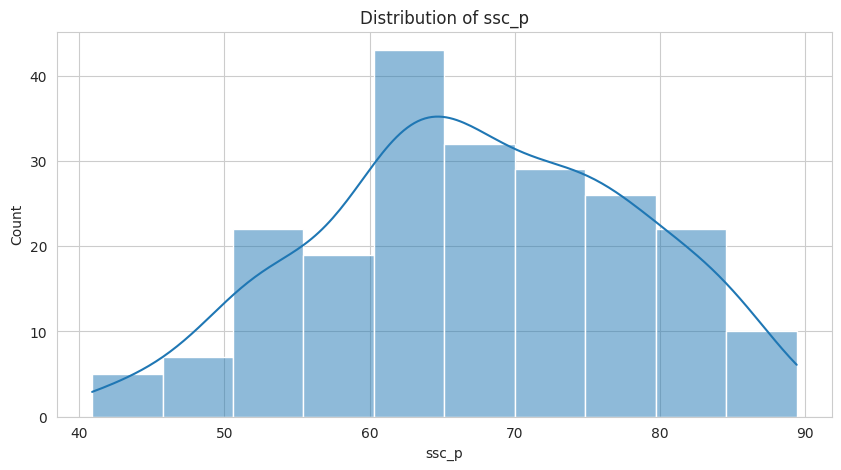

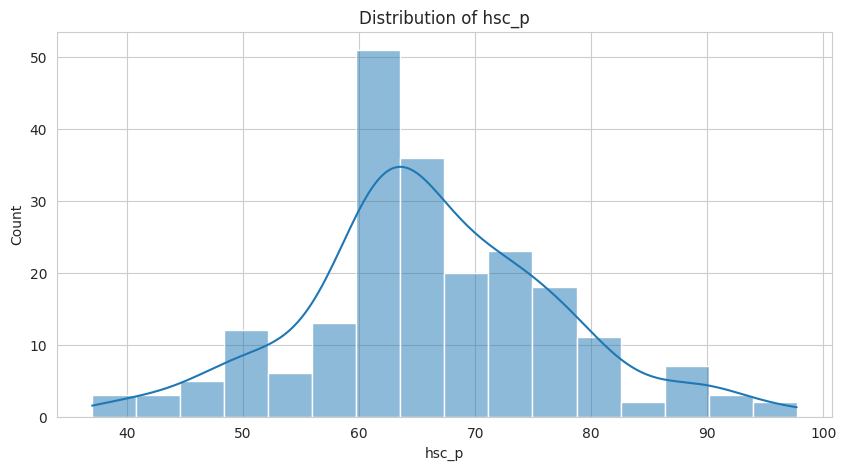

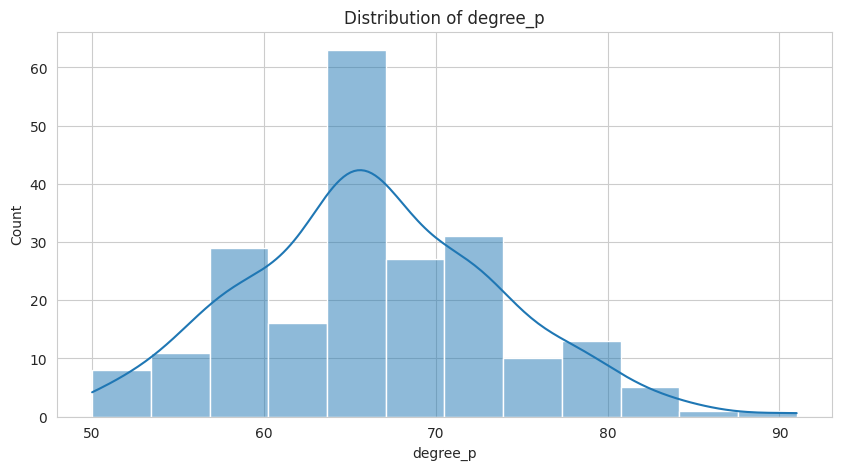

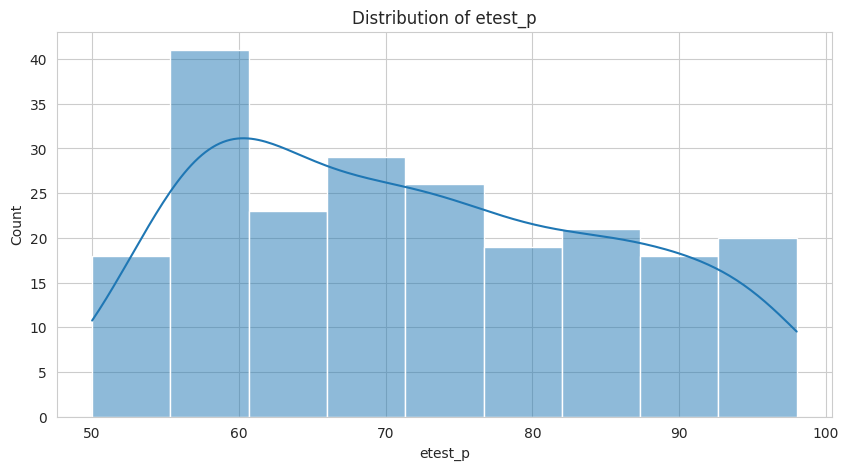

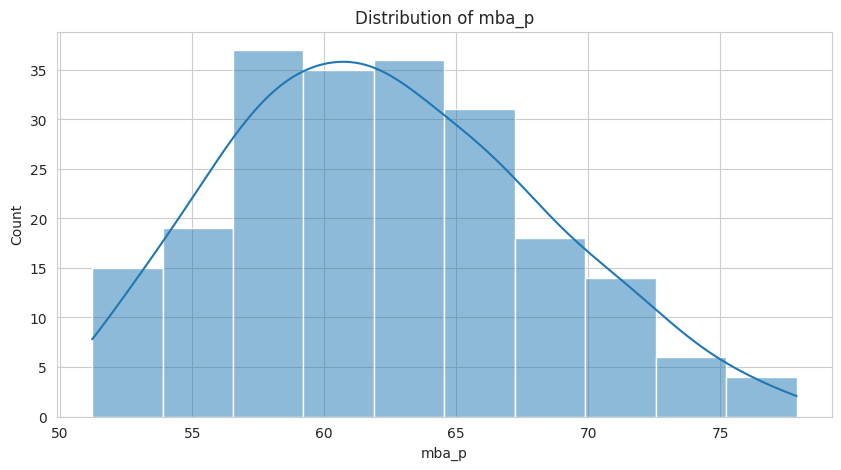

In [76]:
# Visualize distributions of numerical features
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


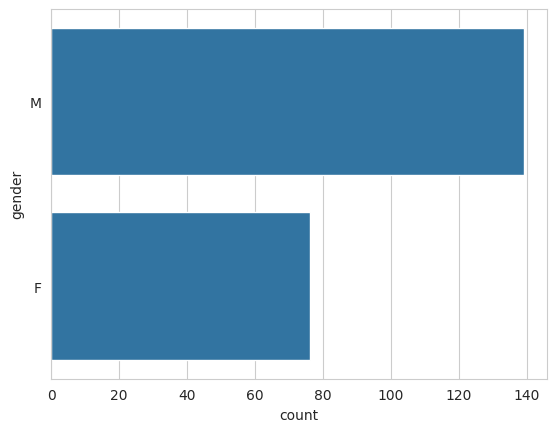

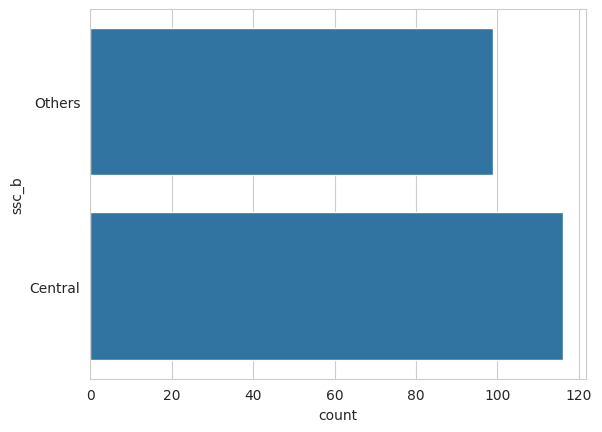

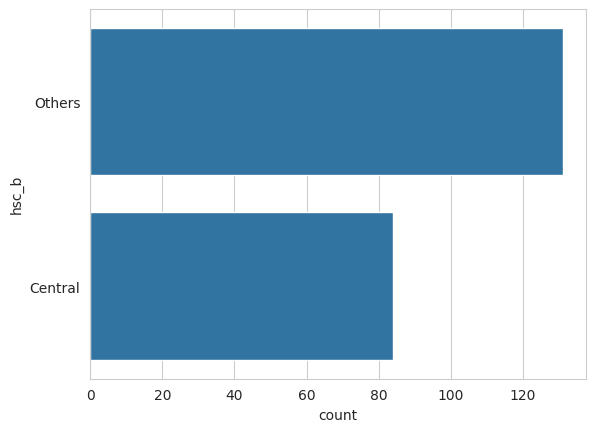

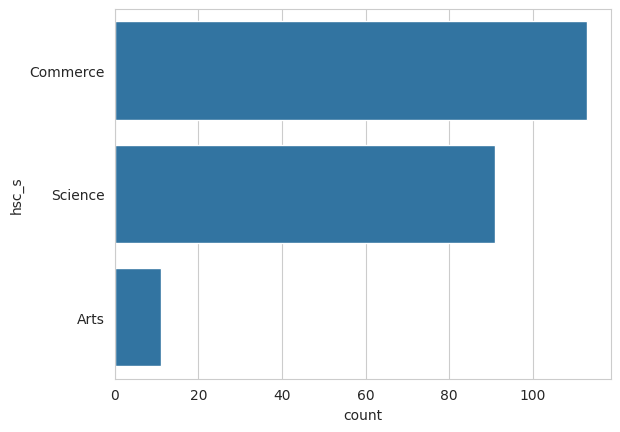

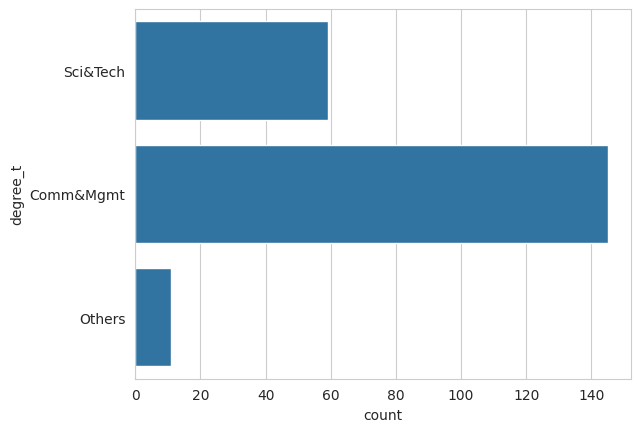

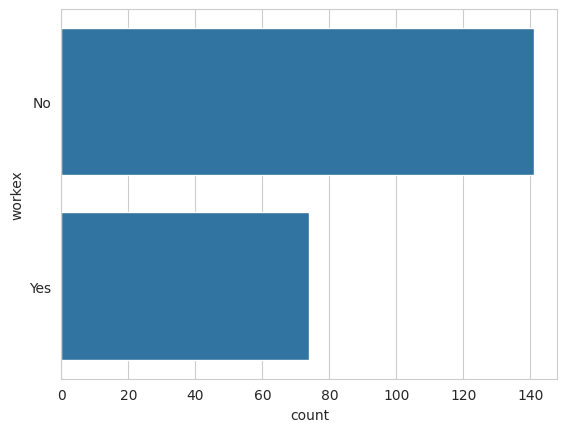

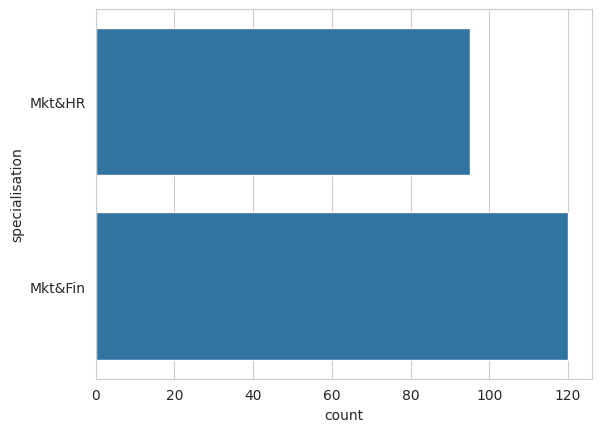

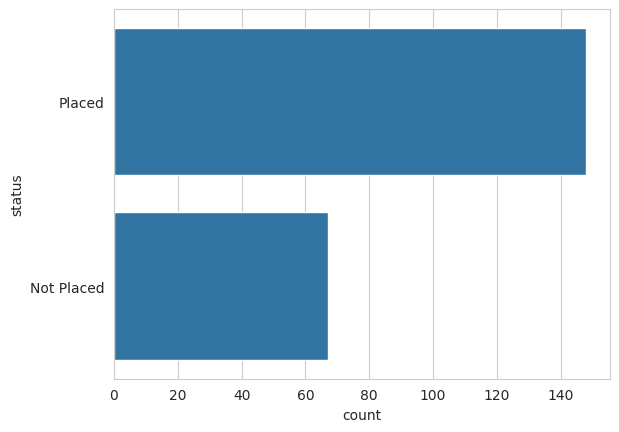

In [77]:
# Visualize distributions of categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    sns.countplot(y=col, data=df)
    plt.show()

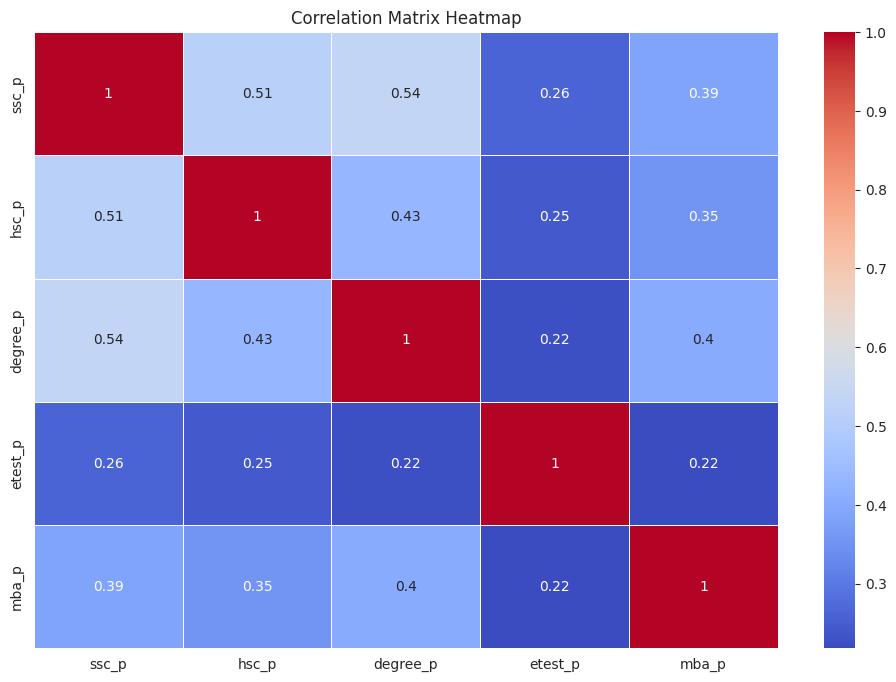

In [78]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_data = df[numerical_cols]

# Generate correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [79]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print distinct values of each categorical column
for col in categorical_columns:
    distinct_values = df[col].unique()
    print(f"Distinct values of '{col}':")
    for value in distinct_values:
        print(value)
    print()

Distinct values of 'gender':
M
F

Distinct values of 'ssc_b':
Others
Central

Distinct values of 'hsc_b':
Others
Central

Distinct values of 'hsc_s':
Commerce
Science
Arts

Distinct values of 'degree_t':
Sci&Tech
Comm&Mgmt
Others

Distinct values of 'workex':
No
Yes

Distinct values of 'specialisation':
Mkt&HR
Mkt&Fin

Distinct values of 'status':
Placed
Not Placed



DF Split

In [80]:

# Split data into training and test sets
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Encoding & Standadization

In [81]:

# Function to apply LabelEncoder
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df



label_cols = ['specialisation', 'workex', 'hsc_b', 'ssc_b', 'gender']
onehot_cols = ['hsc_s', 'degree_t']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat_label', FunctionTransformer(lambda X: label_encode(X.copy(), label_cols)), label_cols),
        ('cat_onehot', OneHotEncoder(drop='first'), onehot_cols)
    ],
    remainder='passthrough'
)

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Encode target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


Model Selection


    1. Random Forest: Chosen for its robustness and ability to handle a large number of features.

    2. Gradient Boosting: Selected for its effectiveness in improving prediction accuracy through boosting.

    3. Support Vector Machine (SVM): Chosen for its effectiveness in high-dimensional spaces.

    4. Logistic Regression: Selected for its simplicity and effectiveness in binary classification tasks.

In [82]:
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier()
}

Hyperparameter Tuning

In [83]:
param_grids = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'GradientBoosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
}
# Hyperparameter tuning using GridSearchCV
best_estimators = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

In [84]:
# Model Training and Cross-validation
cv_results = {}
for model_name, model in best_estimators.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_scores
    print(f"Cross-validation scores for {model_name}: {cv_scores}")
    print(f"Mean CV score for {model_name}: {cv_scores.mean()}")

Training RandomForest...
Cross-validation scores for RandomForest: [0.86666667 0.76666667 0.93333333 0.8        0.86666667]
Mean CV score for RandomForest: 0.8466666666666665
Training GradientBoosting...
Cross-validation scores for GradientBoosting: [0.9        0.73333333 0.9        0.86666667 0.8       ]
Mean CV score for GradientBoosting: 0.8400000000000001
Training SVM...
Cross-validation scores for SVM: [0.9        0.8        0.93333333 0.86666667 0.86666667]
Mean CV score for SVM: 0.8733333333333334
Training LogisticRegression...
Cross-validation scores for LogisticRegression: [0.86666667 0.83333333 0.9        0.9        0.83333333]
Mean CV score for LogisticRegression: 0.8666666666666666
Training KNN...
Cross-validation scores for KNN: [0.9        0.8        0.93333333 0.86666667 0.86666667]
Mean CV score for KNN: 0.8733333333333334


Model Evaluation


RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.43      0.56        21
           1       0.78      0.95      0.86        44

    accuracy                           0.78        65
   macro avg       0.80      0.69      0.71        65
weighted avg       0.79      0.78      0.76        65



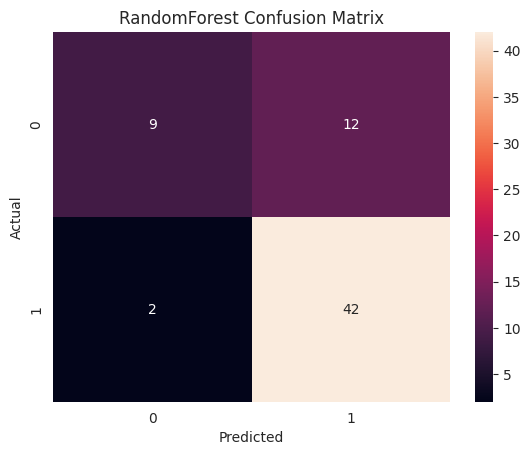


GradientBoosting Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.83      0.91      0.87        44

    accuracy                           0.82        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.81      0.82      0.81        65



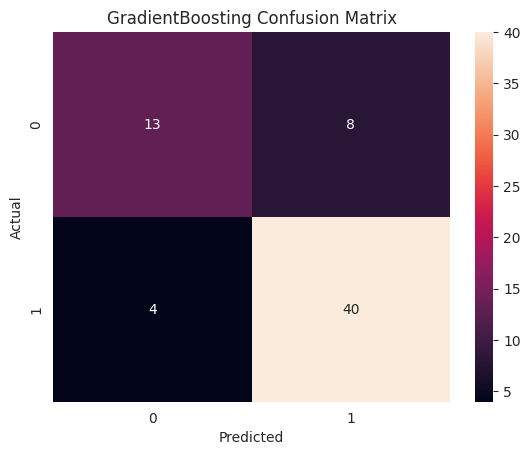


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.38      0.50        21
           1       0.76      0.93      0.84        44

    accuracy                           0.75        65
   macro avg       0.74      0.66      0.67        65
weighted avg       0.75      0.75      0.73        65



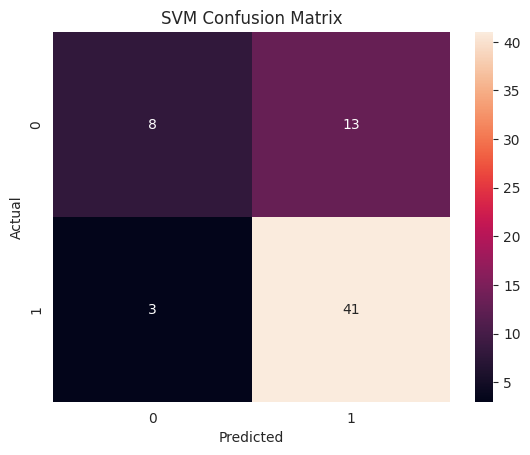


LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.82      0.91      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.79      0.80      0.79        65



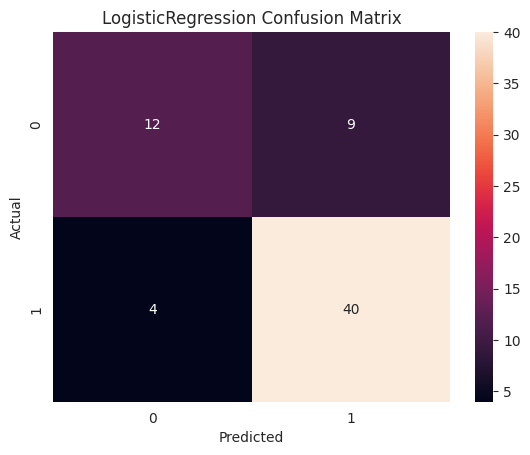


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.38      0.48        21
           1       0.75      0.91      0.82        44

    accuracy                           0.74        65
   macro avg       0.71      0.65      0.65        65
weighted avg       0.73      0.74      0.71        65



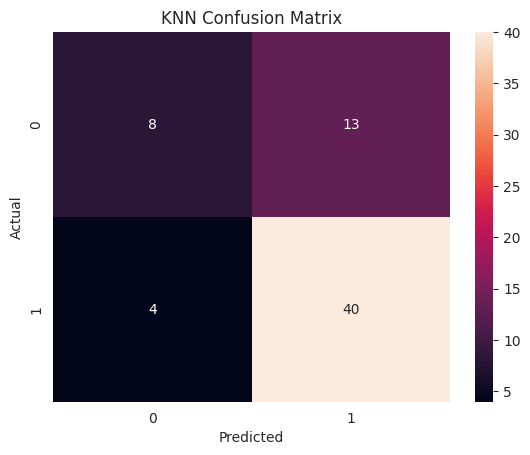


Comparison of Models:
            RandomForest  GradientBoosting       SVM  LogisticRegression  \
Accuracy       0.784615          0.815385  0.753846            0.800000   
Precision      0.777778          0.833333  0.759259            0.816327   
Recall         0.954545          0.909091  0.931818            0.909091   
F1 Score       0.857143          0.869565  0.836735            0.860215   

                KNN  
Accuracy   0.738462  
Precision  0.754717  
Recall     0.909091  
F1 Score   0.824742  


In [85]:
results = {}
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = [accuracy, precision, recall, f1]

    # Print classification report and confusion matrix
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Display comparison of models
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("\nComparison of Models:\n", results_df)

Voting Classifier

In [86]:
## Implement voting classifier
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in best_estimators.items()], voting='soft')
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_precision = precision_score(y_test, y_pred_voting)
voting_recall = recall_score(y_test, y_pred_voting)
voting_f1 = f1_score(y_test, y_pred_voting)

print("\nVoting Classifier Performance:")
print(f"Accuracy: {voting_accuracy}")
print(f"Precision: {voting_precision}")
print(f"Recall: {voting_recall}")
print(f"F1 Score: {voting_f1}")

# Comparing Voting Classifier with individual models
results_df['VotingClassifier'] = [voting_accuracy, voting_precision, voting_recall, voting_f1]
print("\nComparison with Voting Classifier:\n", results_df)


Voting Classifier Performance:
Accuracy: 0.7538461538461538
Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1 Score: 0.8333333333333334

Comparison with Voting Classifier:
            RandomForest  GradientBoosting       SVM  LogisticRegression  \
Accuracy       0.784615          0.815385  0.753846            0.800000   
Precision      0.777778          0.833333  0.759259            0.816327   
Recall         0.954545          0.909091  0.931818            0.909091   
F1 Score       0.857143          0.869565  0.836735            0.860215   

                KNN  VotingClassifier  
Accuracy   0.738462          0.753846  
Precision  0.754717          0.769231  
Recall     0.909091          0.909091  
F1 Score   0.824742          0.833333  


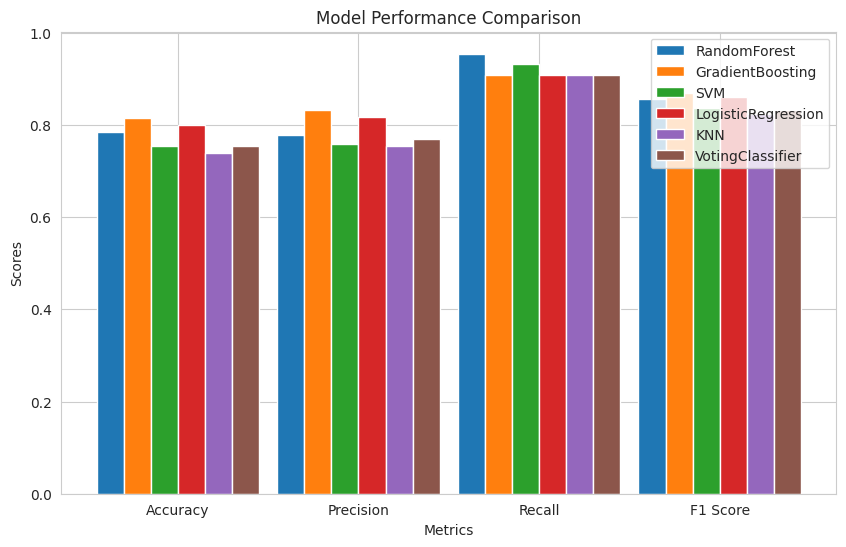

In [90]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = results_df.columns
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
width = 0.15

# Plot each model's performance
for i, model in enumerate(models):
    ax.bar(x + i * width, results_df[model], width, label=model)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.show()